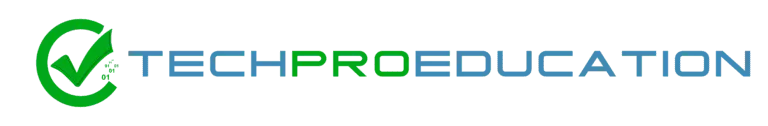

In [ ]:
# bi problemle karsilasinca Huggies orda önceden pre-traned yapilmis binlerce Corpus model var.

#ANN deki hafiza problemini RNN de cözmüsler , RNN de bir öncekinden gelen bilgiler o anki zaman ile islenip muhafaza edilebiliyrodu
# en son adimda alf´digi hafizada daha güclü kaliyor
# ama bir yerden sonra RNN deki hafiza yaterli gelmiyor, önce LSTM ile cözülüyor,
# unutulmaya cözüm bulunmaya calisilmis, 
# GRU ile tam cözüm bulunuyor, LSTMden farki GRU da daha az kapi var, 2 tane kapi var,
# aralarinda bilgi kaybi anlaminda cok fark yok,
# modelein ana yapisi RNN, sonra LSTM ve sonrasinda da GRU olarak gelismis

# bu noteboookta NLP islemlerini yaptiktan sonra ML ye vermistik burda iise DL ile yapiyoruz
# 

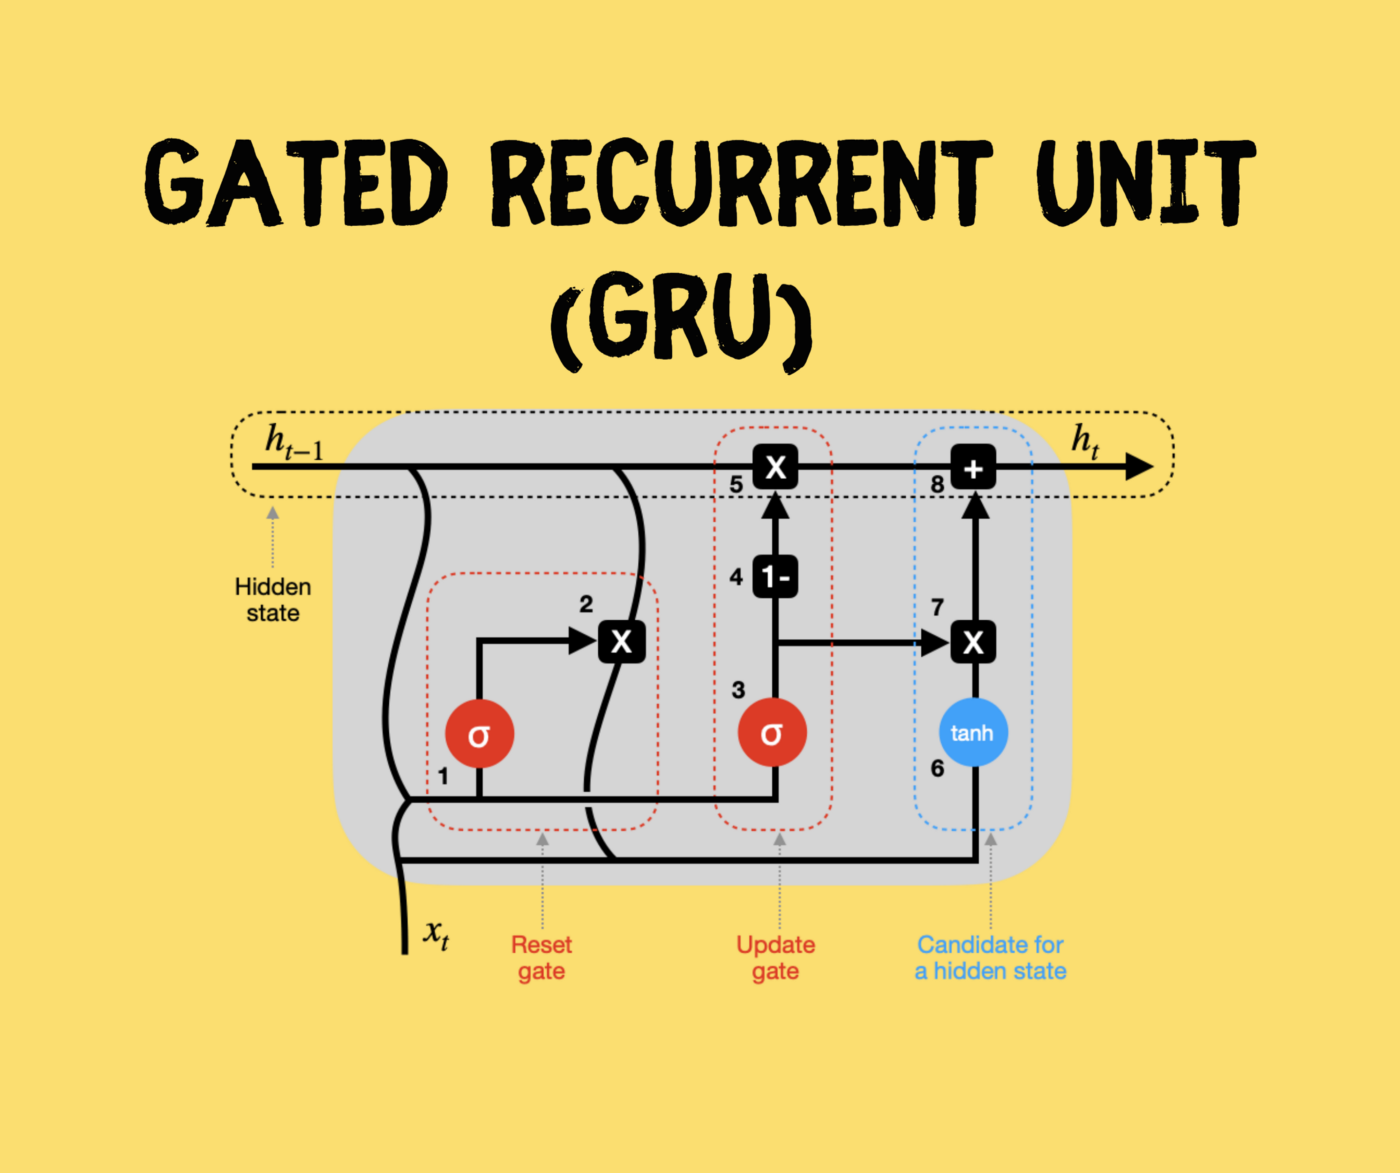

## NLP with DL

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer #Tensorflow'un böyle bir fonksiyonu var
from tensorflow.keras.preprocessing.sequence import pad_sequences #sequence'lerin ayni boyda olmasini sagliyor

#Embedding bir kelimenin diger kelimelerle olan anlamsal iliskisini yakalamaya calisiyor
# DL de BAtch Normalization nadir kullanilir


In [2]:
df = pd.read_csv('hepsiburada.csv')

In [3]:
df.head()
# 2 featuresli data 

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243497 entries, 0 to 243496
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  243497 non-null  int64 
 1   Review  243497 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
#NLP de misssing valuelari doldurma islemi yok,
# ama veriyi cogaltma teknikleri var CNN de oldugu gibi resmi, egik büküp farkli resimler üretmeye benziyor
# eger biri sadece rating yapiyor,eger text yoksa biz texti dolduramiyoruz, onlari cikarmaliyiz
# eger müsteri bize text getirdiginde bunlari önceden labellama yapmamiz gerekiyor,
# metinlerin olumlu mu olumsuz mu oldugu etiketlenmesi gerekir

In [5]:
df.Rating.value_counts()
#imbalance bir data var

1    229821
0     13676
Name: Rating, dtype: int64

In [6]:
df.Rating = df.Rating.map({1:0, 0:1})
#hedef labeli 1 yapiyorduk,
#recal deyince 1 in recalunu görüyorduk
# biz burda olumsuzlari belirleyecegimiz icin, tam tersine ceviriyor,
# sirket olumsuzlari incelemek istiyor

In [7]:
df.Rating.value_counts()
#ters cevirdik

0    229821
1     13676
Name: Rating, dtype: int64

In [8]:
pd.Series(df.Rating).value_counts(normalize=True)
#aradaki orani virgullu yaptik

0    0.943835
1    0.056165
Name: Rating, dtype: float64

## Tokenization

In [9]:
X = df['Review'].values
y = df['Rating'].values
# DL de array olarak calismak daha kolay oluyor, arra olarak veriyoruz datalari
# 

In [10]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words)   #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' bu gibi isaretlemeleri bunu metin icinden cikariyor, filter parametresi,parantez icindee word_nums yanina yaziliyor
#num_words parametresini num_words degiskenine atadik

# 250binlik veri var, burda datayi kisitlamak iyi olabiliyor bazen
# corpusta 15binden az olan kelimeleri dahil etmek daha iyi ,en cok kullanilan kelimelerden ilk 15 bin kelimeyi aliyor
# NAN olarak biraksan num_words su bazen cok farkli sonuc cikmayabiliyor zaman olarak cok zaman aliyor

In [11]:
tokenizer.fit_on_texts(X) #Tensorflowun kendisinin gelistirdigi tokenizer fonksiyonu,otomatik olarak lower yapiyor
# burda token haline getiriyor
# bu kisimda textin icindeki tüm kelimeleri token haline getirdi
# 

In [ ]:
#Lemmitazition ve stemmization DL de yapilmiyor, DL nin yapisi farkli ,ML gibi hantal degil, hizli
# DL de nöronlarla RNN gibi hafiza olaylari oldugu icin gerek yok lemmitization ve stemming islemlerine

## Creating word index

In [12]:
tokenizer.word_index
#burda 1 kere gecenler , bize cok fazla fayda saglamayabilir
#burda en cok gecen ilk 15000 kelime
# en cok kullanilan kelime 1ci cok, 2ci bir ---cok kelimesi belki 10 bin kere kullanilmis olabilir

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'iyi': 6,
 'güzel': 7,
 'için': 8,
 'tavsiye': 9,
 'ederim': 10,
 'daha': 11,
 'ama': 12,
 'da': 13,
 'gayet': 14,
 'hızlı': 15,
 'teşekkürler': 16,
 'aldım': 17,
 'de': 18,
 'ürünü': 19,
 'gibi': 20,
 'yok': 21,
 'uygun': 22,
 'olarak': 23,
 'kaliteli': 24,
 'en': 25,
 '2': 26,
 'kargo': 27,
 'fiyat': 28,
 'elime': 29,
 'kadar': 30,
 'ile': 31,
 'göre': 32,
 'geldi': 33,
 'var': 34,
 'hepsiburada': 35,
 'ben': 36,
 'gerçekten': 37,
 '1': 38,
 'fiyata': 39,
 'gün': 40,
 'sonra': 41,
 'cok': 42,
 'kesinlikle': 43,
 'telefon': 44,
 'biraz': 45,
 'hiç': 46,
 'ulaştı': 47,
 'memnun': 48,
 'hem': 49,
 'değil': 50,
 'kullanışlı': 51,
 '3': 52,
 'mükemmel': 53,
 'oldu': 54,
 'kullanıyorum': 55,
 'önce': 56,
 'sipariş': 57,
 'tek': 58,
 'her': 59,
 'bence': 60,
 'harika': 61,
 'kalitesi': 62,
 'bi': 63,
 'ayrıca': 64,
 '5': 65,
 'teşekkür': 66,
 'fiyatı': 67,
 'olması': 68,
 'ne': 69,
 'herkese': 70,
 'bile': 71,
 'uzun': 72,
 'süper': 73,

In [13]:
len(tokenizer.word_index)

# burda biz ilk 15binini alacagiz

217983

## Converting tokens to numeric

In [14]:
X_num_tokens = tokenizer.texts_to_sequences(X)
#textimiz tokenize islemi yapmis oluyoruz, yukarida parcaladi burda ise vector haline getiriyor

In [15]:
X[105]
# bu normal yorum asagida ise bu yorumu vectörize yapti

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [16]:
print(X_num_tokens[105])
# burda cok 5ciye gelmis, biz burda 15n´bin diye kiyaslamistik, demkeki öndeki kelimelerinden biri o 15binden olmayabilir
#burda eskiden oldugu gibi degerleri 0-ile 1 arasina sikistirmiyor, cümlenin boyuna göre degerleri kac kere kullanildigi sayilari veriyor
# 

[1816, 5360, 131, 23, 1, 1849, 74, 12, 118, 1533, 297, 745, 3216, 13402, 6326, 5030, 2463, 113, 2534, 8858, 4, 143]


In [17]:
len(X_num_tokens[105])
#105ci satirin uzunlugu 

22

In [18]:
len(X_num_tokens[106])
#bunlari belli bir sayiya esitlemeliyiz

18

In [19]:
len(X_num_tokens[6150])

88

In [20]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

# her satirdaki token sayisini metnin icerisindeki her kelimeye göre sayilari veriyor

In [ ]:
num_tokens
#her cümlenin token sayilari

## Maximum number of tokens for all documents

In [21]:
num_tokens.mean()

21.36101060793357

In [22]:
num_tokens.max()
# 298 olarak alirsak veri kaybi olmaz, en uzun yorum 298 kelimelik yorum
# eger makinane güveniyorsa, kesmeme daha iyi olur
# ama zaman önemli ise, kesme daha iyi olur, bu nootbookta kestik ve %3 lük bir kayip olmus,
# 

298

In [23]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

21941

In [ ]:
#modele 3 boyutlu verecegiz, bunlardan biri arrayin uzunllugudur

In [24]:
X[21941]
#bu en uzun yorum, 
#burda vurgu genelde son cümlelerde bakilmasi tavsiye ediliyor

'Özellikle bu kısma yazıyorum iyice okuyunuz,cihazın hızı çok iyi.Isınma normal boyutlarda.Kamerası elinizi sabit tutarsanız ve gündüz çok net gece ise çok net çekmez.Görüntülü konuşma özelliği yok ancak uygulama ile olur,anten çekimi gayet iyi.Parmak izi okuyucusu gayet hızlı bazen tuşu silmenizi istiyor ve okuyamıyor kirden vs...Ön kamera da tatmin edici,çekim esnasında ekran beyaz ışık vererek flaş görevi görür.Batarya bana 1 hafta gidiyor sık kullanımda ise 2-3 gün gidiyor.Hızlı şarj 1 saatte doluyor , şekilleri ele oturuyor ve şık bir görüntü var.Telefonu aldığım gün gittim ve ilk girdiğim yerden ekran koruyucu ve kılıf buldum.Kulaklık sesi çok net ve yüksek ancak kendi hoparlörü biraz zayıf sesi.Ekrana bakarken açık kalma özelliği yok.Diğer akıllı cihaz özellikleri %90 ı bu cihazda mevcut.Güç tasarrufu 2 ayrı modu var ve çok başarılı çalışıyor.4gb ram var genelde yarısı boş kalıyor.Bir de yeni cihazların çoğu titreşimi az ve sesi de az çıkıyor.Bu cihaz da içine dahil...Bu cihazla

In [25]:
len(X_num_tokens[21941])

298

In [26]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 10)
print(sum(np.array(list) < 10)) #ondan kücük olan 3 tane var
print(sum(np.array(list) < 10)/len(list))

# asagidaki calismanin mantigini göstermek icin, yapilmis
# 

[ True False  True  True False False]
3
0.5


In [ ]:
#burda mean=21 di en uzunu ise 298 idi,satilara dokument diyorduk
# modele vermek icin sabit bir uzunlukta vermek gerekir,bunu shape olarak belireyecem


In [27]:
max_tokens = 61
#belirlemis oldugun rakam, tüm corpus icinde ne kadarlik yer kapliyor,
#burda mean=21 idi yani 61 secerekte verinin %95 ini aliyoruz, bir nevi outlierlari atmis olduk
#%3 luk degerde de 61 yorumunda 61 den fazla kelime olan yorumlar var
#burda shapebin 3 boyutundan birinin adini koyduk

In [28]:
sum(num_tokens < max_tokens) / len(num_tokens)
#kesmeye karar verdiysen,  bu 61 e göre verirnin %95 i kavriyorum anlamina geliyor
#burda %3 lük kayip var, bazen cok fazla zamanin  varsa kesebilirsin

0.9598968365113328

In [29]:
sum(num_tokens < max_tokens)

233732

In [30]:
len(num_tokens)

243497

## Fixing token counts of all documents (pad_sequences)

In [31]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

# 

In [32]:
X_pad.shape
#243487 satiri, 65 ten itibaren kes dedik

(243497, 61)

In [33]:
np.array(X_num_tokens[800])
# normalde böyle olan bir yprumu, asagida 61 e tamamliyor

array([  19,  341,   52,  194,   30,   54, 7992,   55,  209,  603, 7887,
          3,   36,  114,  164,  479,   85,    1, 1682,  782,   30,    2,
        380,  326,    3,    1,   81,  132,  562,    9,   10])

In [34]:
X_pad[800]
#doldirmak icin önlerine 0 verdi

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   19,  341,   52,
        194,   30,   54, 7992,   55,  209,  603, 7887,    3,   36,  114,
        164,  479,   85,    1, 1682,  782,   30,    2,  380,  326,    3,
          1,   81,  132,  562,    9,   10])

In [35]:
np.array(X_num_tokens[21941])
# 

array([  145,     5,  5876,  2225,  1653,   902,   203,     1,     6,
        2958,   163,  4248,   374,  3449,  1521, 12582,     3,  1381,
           1,   491,   281,   140,     1,   491,  3391,  2388,   235,
          21,    82,   756,    31,   212,  4458,  1448,    14,     6,
         472,   609,  2159,    14,    15,   673,  1681,  2152,     3,
         313,   444,   261,    13,   561,   463,   470,  1664,   168,
         639,   519,  3209,  5455,  6409,   600,   625,   153,    38,
         194,   272,   635,   389,   140,    26,    52,    40,   272,
          15,    84,    38,   466,  1679, 12350,  1036,   999,     3,
          96,     2,   318,    34,   134,   169,    40,  2752,     3,
          77,   750,   168,   881,     3,   509,   571,   359,   195,
           1,   491,     3,   172,    82,   256,  6460,    45,   926,
         195,  2061,  6575,   603,  7031,   235,    21,   103,   931,
         136,   394,  1316,  1917,     5,  2167,   567,  1034,  2217,
          26,   335,

In [36]:
X_pad[21941]
#bu sekilde 61 hale getirdi,önce olanlari iptal ederek bir nevi yorumun son kisimlri aliyor

array([ 872, 3501,  537, 1804,  488, 2218,   75,  163,    2,  456,   13,
       1308, 1865, 3432,    5,  824, 7798,  836, 1640, 7838, 3344,   12,
       1308,   31, 3063,  299, 2704,  851, 1052,   39, 1490, 3436,  317,
       1170,   75,  537,   50,  327,  246, 1322,  120,    2, 3436, 7527,
        199,  260,  579, 6176, 1800,   13,   45,  808,  108,    3,  865,
        749, 5840,   50,  106,   76,  879])

## Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)
#burda X_pad oalrak verdi, hepsi 61 boyunda olacak

## Modelling

In [39]:
model = Sequential()
#ard arda devam edecek bir model

In [40]:
embedding_size = 50

#bunun ile oynayarak overfittinge engelleyebiliriz
#örnegin izmir kelimesi icin, hangi kelimelerle bir anlamsal iliski sagliyorsa, izmirle baglantili 50 kelime grubu olusturuyor,her kelime icin bu 50 yi yapiyor,yana dosru 61 kelime vardi
#hoca 100 verdigimizde overfitting oldu dedi,
#veya en sonda over fitting gördüysen 50den de asagi verebilirsin
# 

![](2022-11-26-21-29-48.png)

In [41]:
# pip install -U numpy==1.19.5

In [42]:
model.add(Embedding(input_dim=num_words, #ilk 15 bin tokeni al birinci boyut
                    output_dim=embedding_size, #kac boyutta olacagini gösteriyor, ikinci boyut
                    input_length=max_tokens))  #her bir yorumun uzunlugu. 3cü boyut shapelerdeki#(15000,50,61) gibi oluyor
#bunu 50 nöronun oldugu bir katman olarak degerlendirebiliriz,burasi bizim bizim input girisi gibi olyor,inputlari kapatip aciyor,dropout,

model.add(Dropout(0.2)) # 50 boyutlu vectorun %20sine yakin kapatir,nöronlarin yuzde 20sini söndürüyor

model.add(GRU(units=48, return_sequences=True)) #buraya bir katman koyduk,48 secmis hoca, baska sayilarda olabilir
model.add(Dropout(0.2))

#return sequence = what time is it, modele girince hafizaya aliniyordu, bir sonraki katmana gecerken burda True olursa, o katmana keyword degilde tüm kelimeler veriliyor, normalde unutulmamasi gereken kelimeler veriliyor

#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.2))

model.add(GRU(units=12))

model.add(Dense(1, activation='sigmoid'))

#burda yukarida Embedding yapiyoruz

In [43]:
optimizer = Adam(learning_rate=0.01)
#overfitting ile mücadelede bu da önemli bir faktör,problemin cesidine göre farkli sayilari deneyerek bulabilyoruz

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

https://stats.stackexchange.com/questions/328926/how-many-parameters-are-in-a-gated-recurrent-unit-gru-recurrent-neural-network

In [45]:
model.summary() 
# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 100*48 +2*48)*3 ==> m = 100, n = 48
# (24*24 + 48*24  +2*24)*3 ==> m =  48, n = 24
# (12*12 + 24*12  +2*12)*3 ==> m =  24, n = 12



#ilk embeding katmaninda None yazan aslinda 15bin olarak verdigimiz
#GRU yerine LSTM de yapabiliriz

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 50)            750000    
                                                                 
 dropout (Dropout)           (None, 61, 50)            0         
                                                                 
 gru (GRU)                   (None, 61, 48)            14400     
                                                                 
 dropout_1 (Dropout)         (None, 61, 48)            0         
                                                                 
 gru_1 (GRU)                 (None, 12)                2232      
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 766,645
Trainable params: 766,645
Non-trai

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",  #validation recallun degerini takip edecek,iki defa bakarak yap dedik
                           verbose=1, patience = 2, restore_best_weights=True)

#early stoppingte veriyoruz
# mode auto ve max secilebilir
# auto yazinca ordaki trendi takip ediyor, eger epocta recall düserse, düsügü yakaliyor
# max yazinca early stoppingteki yüksek degeri aliyoruz                           

In [47]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

#dengesiz datalrda class_weigth bir denge sagliyor

array([0.52975426, 8.90215702])

https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss

In [48]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

         

Epoch 1/10
761/761 [==============================] - 194s 243ms/step - loss: 0.3173 - recall: 0.8626 - val_loss: 0.3517 - val_recall: 0.9225
Epoch 2/10
761/761 [==============================] - 177s 232ms/step - loss: 0.1985 - recall: 0.9271 - val_loss: 0.1889 - val_recall: 0.8380
Epoch 3/10
761/761 [==============================] - 165s 217ms/step - loss: 0.1577 - recall: 0.9460 - val_loss: 0.1473 - val_recall: 0.7704
Epoch 3: early stopping


## Model evaluation

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.317289,0.862627,0.351671,0.922486
1,0.198518,0.927063,0.188932,0.838026
2,0.157723,0.945983,0.147333,0.770384


<AxesSubplot: >

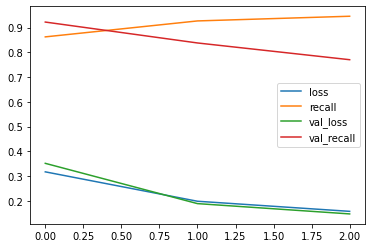

In [50]:
model_loss.plot()

In [51]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 102s 17ms/step - loss: 0.3279 - recall: 0.9683


[0.32794034481048584, 0.9682844281196594]

In [52]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 31s 20ms/step - loss: 0.3517 - recall: 0.9225


[0.35167109966278076, 0.9224863052368164]

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

# burda recalla bakmak daha mantikli ,saglikta oldugu gibi,negatif degerleri yakalamaliyiz

[[158799  25057]
 [   347  10594]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.93    183856
           1       0.30      0.97      0.45     10941

    accuracy                           0.87    194797
   macro avg       0.65      0.92      0.69    194797
weighted avg       0.96      0.87      0.90    194797



In [54]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[39274  6691]
 [  212  2523]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     45965
           1       0.27      0.92      0.42      2735

    accuracy                           0.86     48700
   macro avg       0.63      0.89      0.67     48700
weighted avg       0.95      0.86      0.89     48700



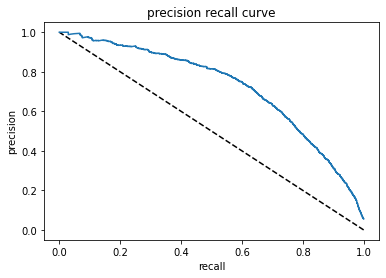

In [55]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [56]:
average_precision_score(y_test, y_pred_proba)

0.7229771505695283

##Scores without sample_weight

In [57]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[158799  25057]
 [   347  10594]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.93    183856
           1       0.30      0.97      0.45     10941

    accuracy                           0.87    194797
   macro avg       0.65      0.92      0.69    194797
weighted avg       0.96      0.87      0.90    194797



In [58]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[39274  6691]
 [  212  2523]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     45965
           1       0.27      0.92      0.42      2735

    accuracy                           0.86     48700
   macro avg       0.63      0.89      0.67     48700
weighted avg       0.95      0.86      0.89     48700



In [ ]:
#bu asagidaki haliylede deneyebiliriz dedi hoca

## Base model without sample weights


model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.5))

model.add(GRU(units=48, return_sequences=True))

model.add(Dropout(0.5))

model.add(GRU(units=12))

model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)


model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])


model.fit(X_train, y_train, epochs=1, batch_size=128,
         validation_data=(X_test, y_test))

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[158799  25057]
 [   347  10594]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.93    183856
           1       0.30      0.97      0.45     10941

    accuracy                           0.87    194797
   macro avg       0.65      0.92      0.69    194797
weighted avg       0.96      0.87      0.90    194797



In [60]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[39274  6691]
 [  212  2523]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     45965
           1       0.27      0.92      0.42      2735

    accuracy                           0.86     48700
   macro avg       0.63      0.89      0.67     48700
weighted avg       0.95      0.86      0.89     48700



## Model Saving

In [61]:
model.save('review_hepsiburada.h5')

##Loading Model

In [64]:
from tensorflow.keras.models import load_model
model_review = load_model('review_hepsiburada.h5')

## Predicton

In [65]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "üründe sıkıntı var"
review13 = "televizyonun görüntü kalitesi çok kötü, dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. "
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [66]:
tokens = tokenizer.texts_to_sequences(reviews)

In [67]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 61)

In [68]:
(model_review.predict(tokens_pad) >0.5).astype("int")

#cogunu bilmis yukardakini

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

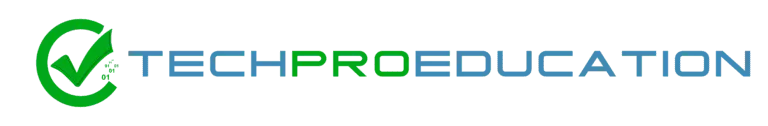